In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('updated_students_data.csv')
parent=pd.read_csv('updated_parent_data.csv')
teach=pd.read_csv('teachers_update.csv')
acad=pd.read_csv('updated_academic_records1.csv')
clas=pd.read_csv('class_rooms.csv')
exam=pd.read_csv('exam_result2_updated_check.csv')

In [3]:
df.tail()

,student_id,name,age,gender,home_language,residential_area,household_income,department
495,496,Dele obaasemaku,18,Male,Yoruba,Urban,Middle,Commercial
496,497,Titi owoyemi,15,Female,Yoruba,Rural,Middle,Commercial
497,498,Gbenga Balogun,17,Male,Yoruba,Rural,High,Commercial
498,499,Seun Ogunleye,16,Male,Yoruba,Urban,Middle,Commercial
499,500,Bisi Ogunleye,15,Female,Yoruba,Rural,Middle,Commercial


In [4]:
df.isna().sum()

student_id          0
name                0
age                 0
gender              0
home_language       0
residential_area    0
household_income    0
department          0
dtype: int64

In [5]:
parent.tail()

,involvement_id,student_id,marital_status,educational_level,attendance,academic_performance
495,496,496,Married,Tertiary,False,False
496,497,497,Divorced,Secondary,True,False
497,498,498,Married,Secondary,True,False
498,499,499,Married,Tertiary,False,True
499,500,500,Divorced,Secondary,True,True


In [6]:
teach.tail()

,teacherid,name,subject_specialization,years_of_experience
65,66,Opeyemi Agboola,Marketing,18
66,67,Tunde Makinde,Marketing,10
67,68,Kehinde Anyanwu,Marketing,15
68,69,Oluwadamilola Okoroafor,Visual Art,15
69,70,Uche Suleiman,Visual Art,12


In [7]:
import json

# A function to clean and parse JSON
def parse_json_safe(json_str):
    try:
        # Replace single quotes with double quotes
        json_str = json_str.replace("'", '"')
        return json.loads(json_str)
    except json.JSONDecodeError:
        # Handle the case where the string is not valid JSON
        return None  # or return an empty dict {}

# Apply the function to clean and convert the column
exam['subject_scores'] = exam['subject_scores'].apply(parse_json_safe)


In [8]:
import json

# Function to safely parse JSON or return the dictionary if it's already in that format
def parse_json_safe(value):
    if isinstance(value, str):
        return json.loads(value)
    return value  # Return the value as is if it's already a dictionary

# Apply the function to the 'subject_scores' column
exam['subject_scores'] = exam['subject_scores'].apply(parse_json_safe)

# Expand the JSON column into separate columns
exam_json_expanded = pd.json_normalize(exam['subject_scores'])

# Concatenate the original DataFrame with the expanded JSON DataFrame
exam = pd.concat([exam, exam_json_expanded], axis=1)

print(exam.head())


   result_id  student_id exam_type department  \
0          1           1    WASSCE    Science   
1          2           2    WASSCE    Science   
2          3           3    WASSCE    Science   
3          4           4    WASSCE    Science   
4          5           5    WASSCE    Science   

                                      subject_scores pass_or_fail  \
0  {'Mathematics': 49, 'English': 54, 'Physics': ...         Fail   
1  {'Mathematics': 50, 'English': 51, 'Physics': ...         Pass   
2  {'Mathematics': 59, 'English': 53, 'Physics': ...         Pass   
3  {'Mathematics': 45, 'English': 53, 'Physics': ...         Fail   
4  {'Mathematics': 64, 'English': 66, 'Physics': ...         Pass   

   Mathematics  English  Physics  Chemistry  ...  Fine Arts  \
0         49.0     54.0     65.0       53.0  ...        NaN   
1         50.0     51.0     51.0       63.0  ...        NaN   
2         59.0     53.0     49.0       49.0  ...        NaN   
3         45.0     53.0     60.0      

In [9]:
exam.tail()

,result_id,student_id,exam_type,department,subject_scores,pass_or_fail,Mathematics,English,Physics,Chemistry,...,Fine Arts,Religious Studies,Marketing,Christian Religious Studies,Commerce,Financial Accounting,English Language,Geography,Yoruba Language,Religious and Moral Instructions
495,496,496,WASSCE,Commercial,"{'Financial Accounting': 57, 'Commerce': 71, '...",Pass,56.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,71.0,57.0,52.0,NaN,76.0,73.0
496,497,497,WASSCE,Commercial,"{'Financial Accounting': 59, 'Commerce': 45, '...",Fail,61.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,45.0,59.0,55.0,NaN,NaN,NaN
497,498,498,WASSCE,Commercial,"{'Financial Accounting': 59, 'Commerce': 45, '...",Fail,62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,45.0,59.0,60.0,51.0,54.0,NaN
498,499,499,WASSCE,Commercial,"{'Financial Accounting': 63, 'Commerce': 59, '...",Pass,55.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,59.0,63.0,65.0,57.0,70.0,NaN
499,500,500,WASSCE,Commercial,"{'Financial Accounting': 72, 'Commerce': 67, '...",Fail,48.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67.0,72.0,48.0,NaN,NaN,53.0


In [10]:
exam.drop('subject_scores', inplace=True, axis=1)

In [11]:
exam.head()

,result_id,student_id,exam_type,department,pass_or_fail,Mathematics,English,Physics,Chemistry,Biology,...,Fine Arts,Religious Studies,Marketing,Christian Religious Studies,Commerce,Financial Accounting,English Language,Geography,Yoruba Language,Religious and Moral Instructions
0,1,1,WASSCE,Science,Fail,49.0,54.0,65.0,53.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,WASSCE,Science,Pass,50.0,51.0,51.0,63.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,WASSCE,Science,Pass,59.0,53.0,49.0,49.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,WASSCE,Science,Fail,45.0,53.0,60.0,46.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,WASSCE,Science,Pass,64.0,66.0,64.0,61.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
exam.English.unique()

array([54., 51., 53., 66., 63., 50., 52., 55., 59., 48., 68., 57., 62.,
       35., 45., 58., 65., 49., 43., 39., 46., 76., 64., 67., 60., 56.,
       61., 70., 40., 72., 47., 79., 83., 71., 69., 44., 38., 74., 34.,
       41., nan])

In [13]:
exam=exam[exam['English'].isna() & exam['pass_or_fail']!='Pass' ]
exam=exam[exam['Mathematics'].isna() & exam['pass_or_fail']!='Pass' ]
exam.head()

,result_id,student_id,exam_type,department,pass_or_fail,Mathematics,English,Physics,Chemistry,Biology,...,Fine Arts,Religious Studies,Marketing,Christian Religious Studies,Commerce,Financial Accounting,English Language,Geography,Yoruba Language,Religious and Moral Instructions
0,1,1,WASSCE,Science,Fail,49.0,54.0,65.0,53.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,WASSCE,Science,Pass,50.0,51.0,51.0,63.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,WASSCE,Science,Pass,59.0,53.0,49.0,49.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,WASSCE,Science,Fail,45.0,53.0,60.0,46.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,WASSCE,Science,Pass,64.0,66.0,64.0,61.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
exam.English.unique()

array([54., 51., 53., 66., 63., 50., 52., 55., 59., 48., 68., 57., 62.,
       35., 45., 58., 65., 49., 43., 39., 46., 76., 64., 67., 60., 56.,
       61., 70., 40., 72., 47., 79., 83., 71., 69., 44., 38., 74., 34.,
       41., nan])

In [15]:
exam.department.value_counts()

department
Commercial    298
Arts          119
Science        83
Name: count, dtype: int64

In [16]:
group=exam.groupby("department")

In [17]:
art=group.get_group('Arts')
science=group.get_group('Science')
comm=group.get_group('Commercial')

In [18]:
art.head()

,result_id,student_id,exam_type,department,pass_or_fail,Mathematics,English,Physics,Chemistry,Biology,...,Fine Arts,Religious Studies,Marketing,Christian Religious Studies,Commerce,Financial Accounting,English Language,Geography,Yoruba Language,Religious and Moral Instructions
83,84,84,WASSCE,Arts,Fail,43.0,67.0,NaN,NaN,NaN,...,60.0,42.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,85,85,WASSCE,Arts,Pass,66.0,67.0,NaN,NaN,51.0,...,69.0,58.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,86,86,WASSCE,Arts,Pass,NaN,55.0,NaN,NaN,NaN,...,63.0,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN
86,87,87,WASSCE,Arts,Pass,65.0,59.0,NaN,NaN,58.0,...,54.0,NaN,61.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN
87,88,88,WASSCE,Arts,Fail,39.0,50.0,NaN,NaN,NaN,...,58.0,NaN,52.0,45.0,49.0,NaN,NaN,NaN,NaN,NaN


In [19]:
art.drop(['Agricultural Science','Computer Science','Further Mathematics','English Language'],axis=1, inplace=True)

/var/folders/00/vmfrhll16j34hz9bwfj_1rp00000gn/T/ipykernel_821/1144102592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art.drop(['Agricultural Science','Computer Science','Further Mathematics','English Language'],axis=1, inplace=True)


In [20]:
art.head()

,result_id,student_id,exam_type,department,pass_or_fail,Mathematics,English,Physics,Chemistry,Biology,...,Government,Fine Arts,Religious Studies,Marketing,Christian Religious Studies,Commerce,Financial Accounting,Geography,Yoruba Language,Religious and Moral Instructions
83,84,84,WASSCE,Arts,Fail,43.0,67.0,NaN,NaN,NaN,...,67.0,60.0,42.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN
84,85,85,WASSCE,Arts,Pass,66.0,67.0,NaN,NaN,51.0,...,70.0,69.0,58.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN
85,86,86,WASSCE,Arts,Pass,NaN,55.0,NaN,NaN,NaN,...,59.0,63.0,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN
86,87,87,WASSCE,Arts,Pass,65.0,59.0,NaN,NaN,58.0,...,54.0,54.0,NaN,61.0,62.0,NaN,NaN,NaN,NaN,NaN
87,88,88,WASSCE,Arts,Fail,39.0,50.0,NaN,NaN,NaN,...,51.0,58.0,NaN,52.0,45.0,49.0,NaN,NaN,NaN,NaN


In [21]:
art.columns

Index(['result_id', 'student_id', 'exam_type', 'department', 'pass_or_fail',
       'Mathematics', 'English', 'Physics', 'Chemistry', 'Biology',
       'Civic Education', 'Yoruba', 'Fisheries', 'Economics', 'Visual Art',
       'Data Processing', 'Literature in English', 'History', 'Government',
       'Fine Arts', 'Religious Studies', 'Marketing',
       'Christian Religious Studies', 'Commerce', 'Financial Accounting',
       'Geography', 'Yoruba Language', 'Religious and Moral Instructions'],
      dtype='object')

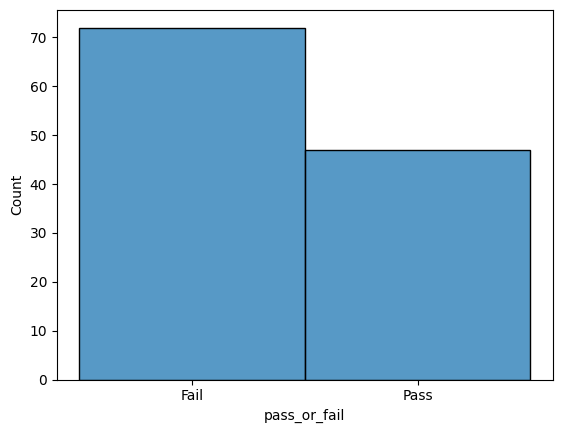

In [40]:
sns.histplot(data=art, x='pass_or_fail')
plt.savefig("art.png")

In [23]:
science.columns

Index(['result_id', 'student_id', 'exam_type', 'department', 'pass_or_fail',
       'Mathematics', 'English', 'Physics', 'Chemistry', 'Biology',
       'Agricultural Science', 'Computer Science', 'Civic Education', 'Yoruba',
       'Fisheries', 'Economics', 'Visual Art', 'Further Mathematics',
       'Data Processing', 'Literature in English', 'History', 'Government',
       'Fine Arts', 'Religious Studies', 'Marketing',
       'Christian Religious Studies', 'Commerce', 'Financial Accounting',
       'English Language', 'Geography', 'Yoruba Language',
       'Religious and Moral Instructions'],
      dtype='object')

In [24]:
science.drop(['Yoruba','Visual Art','Literature in English','English Language','History','Government','Fine Arts','Religious Studies','Commerce','Financial Accounting','Yoruba Language','Religious and Moral Instructions'],axis=1, inplace=True)

/var/folders/00/vmfrhll16j34hz9bwfj_1rp00000gn/T/ipykernel_821/596215817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  science.drop(['Yoruba','Visual Art','Literature in English','English Language','History','Government','Fine Arts','Religious Studies','Commerce','Financial Accounting','Yoruba Language','Religious and Moral Instructions'],axis=1, inplace=True)


In [25]:
science.head()

,result_id,student_id,exam_type,department,pass_or_fail,Mathematics,English,Physics,Chemistry,Biology,Agricultural Science,Computer Science,Civic Education,Fisheries,Economics,Further Mathematics,Data Processing,Marketing,Christian Religious Studies,Geography
0,1,1,WASSCE,Science,Fail,49.0,54.0,65.0,53.0,63.0,52.0,75.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,WASSCE,Science,Pass,50.0,51.0,51.0,63.0,NaN,63.0,NaN,NaN,68.0,47.0,NaN,NaN,NaN,NaN,NaN
2,3,3,WASSCE,Science,Pass,59.0,53.0,49.0,49.0,NaN,59.0,35.0,55.0,NaN,NaN,61.0,NaN,NaN,NaN,NaN
3,4,4,WASSCE,Science,Fail,45.0,53.0,60.0,46.0,NaN,48.0,47.0,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN
4,5,5,WASSCE,Science,Pass,64.0,66.0,64.0,61.0,44.0,NaN,70.0,NaN,56.0,NaN,NaN,60.0,NaN,NaN,NaN


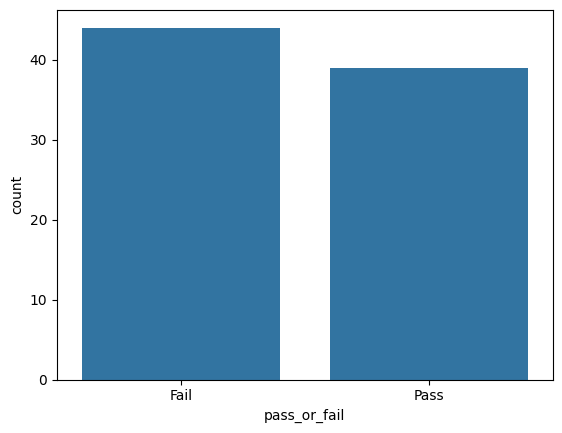

In [41]:
sns.countplot(data=science, x='pass_or_fail')
plt.savefig('science.png')

In [27]:
comm.head()

,result_id,student_id,exam_type,department,pass_or_fail,Mathematics,English,Physics,Chemistry,Biology,...,Fine Arts,Religious Studies,Marketing,Christian Religious Studies,Commerce,Financial Accounting,English Language,Geography,Yoruba Language,Religious and Moral Instructions
202,203,203,WASSCE,Commercial,Fail,68.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,59.0,49.0,59.0,63.0,72.0,NaN
203,204,204,WASSCE,Commercial,Fail,62.0,NaN,NaN,NaN,61.0,...,NaN,NaN,NaN,NaN,44.0,42.0,39.0,74.0,46.0,NaN
204,205,205,WASSCE,Commercial,Fail,70.0,NaN,NaN,NaN,59.0,...,NaN,NaN,NaN,NaN,44.0,66.0,52.0,50.0,NaN,59.0
205,206,206,WASSCE,Commercial,Fail,61.0,NaN,NaN,NaN,55.0,...,NaN,NaN,NaN,NaN,40.0,54.0,63.0,NaN,NaN,61.0
206,207,207,WASSCE,Commercial,Fail,44.0,NaN,NaN,NaN,63.0,...,NaN,NaN,NaN,NaN,42.0,68.0,53.0,NaN,72.0,NaN


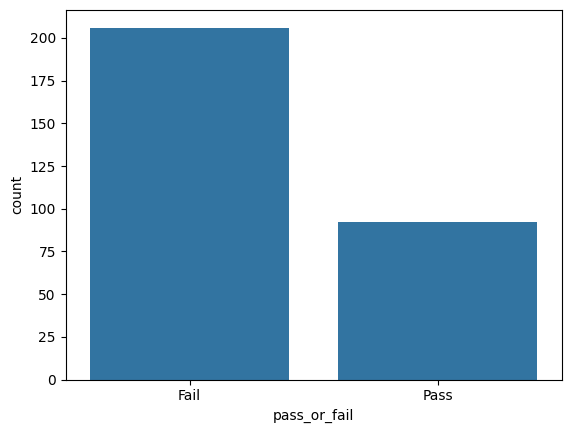

In [42]:
sns.countplot(data=comm, x='pass_or_fail')
plt.savefig('commercial.png')

In [29]:
exam.head()

,result_id,student_id,exam_type,department,pass_or_fail,Mathematics,English,Physics,Chemistry,Biology,...,Fine Arts,Religious Studies,Marketing,Christian Religious Studies,Commerce,Financial Accounting,English Language,Geography,Yoruba Language,Religious and Moral Instructions
0,1,1,WASSCE,Science,Fail,49.0,54.0,65.0,53.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,WASSCE,Science,Pass,50.0,51.0,51.0,63.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,WASSCE,Science,Pass,59.0,53.0,49.0,49.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,WASSCE,Science,Fail,45.0,53.0,60.0,46.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,WASSCE,Science,Pass,64.0,66.0,64.0,61.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='pass_or_fail', ylabel='count'>

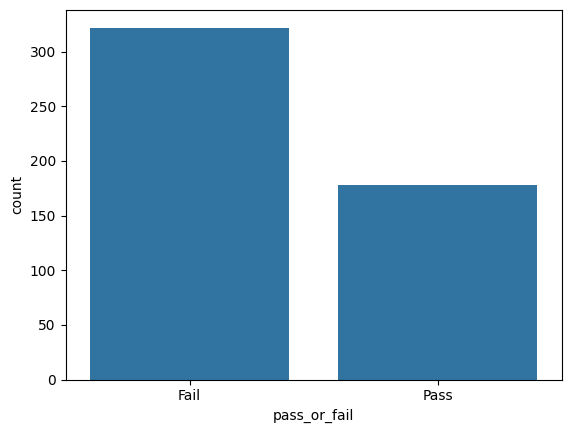

In [30]:
sns.countplot(data=exam, x='pass_or_fail')

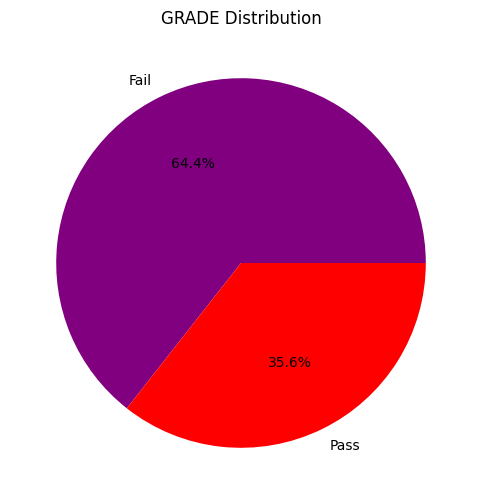

In [43]:
plt.figure(figsize=(7,6))
plt.pie(exam['pass_or_fail'].value_counts(),autopct='%1.1f%%', colors=['purple', 'red'], labels=['Fail', 'Pass'])
plt.title('GRADE Distribution')
plt.savefig('general_Performance.png')

In [32]:
exam.head()

,result_id,student_id,exam_type,department,pass_or_fail,Mathematics,English,Physics,Chemistry,Biology,...,Fine Arts,Religious Studies,Marketing,Christian Religious Studies,Commerce,Financial Accounting,English Language,Geography,Yoruba Language,Religious and Moral Instructions
0,1,1,WASSCE,Science,Fail,49.0,54.0,65.0,53.0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,WASSCE,Science,Pass,50.0,51.0,51.0,63.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,WASSCE,Science,Pass,59.0,53.0,49.0,49.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,WASSCE,Science,Fail,45.0,53.0,60.0,46.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,WASSCE,Science,Pass,64.0,66.0,64.0,61.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
acad.head()

,record_id,student_id,department,subject_scores,attendance_rate
0,1,1,Science,"{""Term_1"": {""Mathematics"": 39, ""English"": 47, ...",73.72
1,2,2,Science,"{""Term_1"": {""Mathematics"": 32, ""English"": 64, ...",83.69
2,3,3,Science,"{""Term_1"": {""Mathematics"": 65, ""English"": 98, ...",93.88
3,4,4,Science,"{""Term_1"": {""Mathematics"": 32, ""English"": 47, ...",69.35
4,5,5,Science,"{""Term_1"": {""Mathematics"": 50, ""English"": 63, ...",81.67


In [34]:
acad.drop('subject_scores', axis=1, inplace=True)

In [35]:
acad.isna().sum().sort_values(ascending=False)

record_id          0
student_id         0
department         0
attendance_rate    0
dtype: int64

In [36]:

acad.to_csv('acadn.csv')

In [46]:
acad['grade']=exam['pass_or_fail']

In [49]:
acad.head()

,record_id,student_id,department,attendance_rate,grade
0,1,1,Science,73.72,Fail
1,2,2,Science,83.69,Pass
2,3,3,Science,93.88,Pass
3,4,4,Science,69.35,Fail
4,5,5,Science,81.67,Pass


In [50]:
acad.to_csv('academics.csv')

In [38]:
result = pd.merge(df,parent, on='student_id', how='inner')  # Inner join by default
print(result)

     student_id             name  age  gender home_language residential_area  \
0             1   Ngozi Ikeckuwu   18  Female          Igbo            Urban   
1             2     Bisi Adebayo   17  Female        Yoruba            Urban   
2             3     Dele Adeyemi   16    Male        Yoruba            Rural   
3             4   Kunle Adewunmi   15    Male        Yoruba            Urban   
4             5   Gbenga Adeyemi   17    Male         Hausa            Rural   
..          ...              ...  ...     ...           ...              ...   
495         496  Dele obaasemaku   18    Male        Yoruba            Urban   
496         497     Titi owoyemi   15  Female        Yoruba            Rural   
497         498   Gbenga Balogun   17    Male        Yoruba            Rural   
498         499    Seun Ogunleye   16    Male        Yoruba            Urban   
499         500    Bisi Ogunleye   15  Female        Yoruba            Rural   

    household_income  department  invol

In [52]:
result.to_csv('result.csv')
result=pd.read_csv('result.csv')
academics=pd.read_csv('academics.csv')

In [53]:
df.head()

,student_id,name,age,gender,home_language,residential_area,household_income,department
0,1,Ngozi Ikeckuwu,18,Female,Igbo,Urban,Middle,Science
1,2,Bisi Adebayo,17,Female,Yoruba,Urban,Middle,Science
2,3,Dele Adeyemi,16,Male,Yoruba,Rural,Middle,Science
3,4,Kunle Adewunmi,15,Male,Yoruba,Urban,Middle,Science
4,5,Gbenga Adeyemi,17,Male,Hausa,Rural,Middle,Science


In [54]:
result2 = pd.merge(result,academics, on='student_id', how='inner')  # Inner join by default
print(result)

     Unnamed: 0  student_id             name  age  gender home_language  \
0             0           1   Ngozi Ikeckuwu   18  Female          Igbo   
1             1           2     Bisi Adebayo   17  Female        Yoruba   
2             2           3     Dele Adeyemi   16    Male        Yoruba   
3             3           4   Kunle Adewunmi   15    Male        Yoruba   
4             4           5   Gbenga Adeyemi   17    Male         Hausa   
..          ...         ...              ...  ...     ...           ...   
495         495         496  Dele obaasemaku   18    Male        Yoruba   
496         496         497     Titi owoyemi   15  Female        Yoruba   
497         497         498   Gbenga Balogun   17    Male        Yoruba   
498         498         499    Seun Ogunleye   16    Male        Yoruba   
499         499         500    Bisi Ogunleye   15  Female        Yoruba   

    residential_area household_income  department  involvement_id  \
0              Urban          

In [55]:
result2.head()

,Unnamed: 0_x,student_id,name,age,gender,home_language,residential_area,household_income,department_x,involvement_id,marital_status,educational_level,attendance,academic_performance,Unnamed: 0_y,record_id,department_y,attendance_rate,grade
0,0,1,Ngozi Ikeckuwu,18,Female,Igbo,Urban,Middle,Science,1,Married,Secondary,True,False,0,1,Science,73.72,Fail
1,1,2,Bisi Adebayo,17,Female,Yoruba,Urban,Middle,Science,2,Married,Tertiary,True,True,1,2,Science,83.69,Pass
2,2,3,Dele Adeyemi,16,Male,Yoruba,Rural,Middle,Science,3,Divorced,Primary,True,True,2,3,Science,93.88,Pass
3,3,4,Kunle Adewunmi,15,Male,Yoruba,Urban,Middle,Science,4,Married,Secondary,True,True,3,4,Science,69.35,Fail
4,4,5,Gbenga Adeyemi,17,Male,Hausa,Rural,Middle,Science,5,Married,Tertiary,False,True,4,5,Science,81.67,Pass


In [70]:
result2.drop(['involvement_id','Unnamed: 0_y','record_id'], axis=1, inplace=True)

In [71]:
result2.tail()

,student_id,name,age,gender,home_language,residential_area,household_income,department_x,marital_status,educational_level,attendance,academic_performance,department_y,attendance_rate,grade
495,496,Dele obaasemaku,18,Male,Yoruba,Urban,Middle,Commercial,Married,Tertiary,False,False,Commercial,75.16,Pass
496,497,Titi owoyemi,15,Female,Yoruba,Rural,Middle,Commercial,Divorced,Secondary,True,False,Commercial,95.65,Fail
497,498,Gbenga Balogun,17,Male,Yoruba,Rural,High,Commercial,Married,Secondary,True,False,Commercial,71.07,Fail
498,499,Seun Ogunleye,16,Male,Yoruba,Urban,Middle,Commercial,Married,Tertiary,False,True,Commercial,78.72,Pass
499,500,Bisi Ogunleye,15,Female,Yoruba,Rural,Middle,Commercial,Divorced,Secondary,True,True,Commercial,79.58,Fail


In [73]:
result2.columns

Index(['student_id', 'name', 'age', 'gender', 'home_language',
       'residential_area', 'household_income', 'department_x',
       'marital_status', 'educational_level', 'attendance',
       'academic_performance', 'department_y', 'attendance_rate', 'grade'],
      dtype='object')

In [75]:
result2.sample()

,student_id,name,age,gender,home_language,residential_area,household_income,department_x,marital_status,educational_level,attendance,academic_performance,department_y,attendance_rate,grade
390,391,Titi Keshinro,18,Female,Yoruba,Rural,High,Commercial,Married,Tertiary,True,False,Commercial,68.97,Pass


<Axes: xlabel='household_income', ylabel='count'>

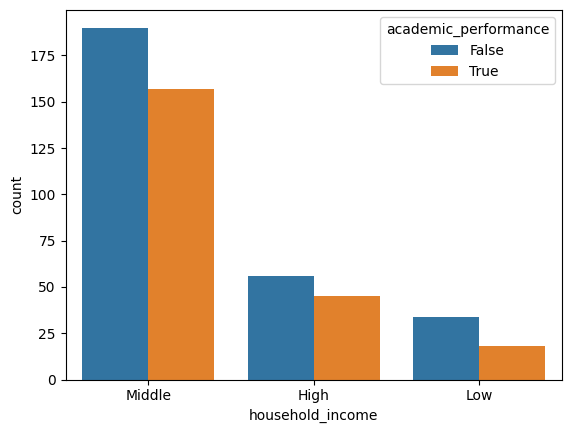

In [92]:
sns.countplot(data=result2, x='household_income', hue='academic_performance')

- Most of the students are from middle class homes and they are still not doing well. Generally the poor academic performance of the school has to be studied.

<Axes: xlabel='department_x', ylabel='count'>

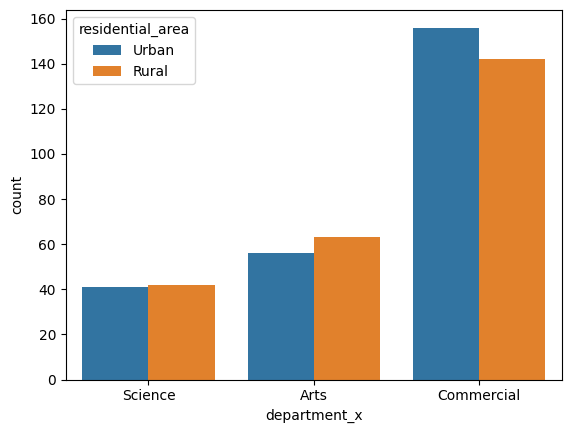

In [90]:
sns.countplot(data=result2, x='department_x', hue='residential_area')

- There are people who live in rural areas and have to go a long distance before getting to the school, this is a contributing factor to them coming late, missing class and not performing well.

In [76]:
df_new =pd.get_dummies(result2['grade']).astype(int)
df_n =pd.get_dummies(result2['department_y']).astype(int)

In [78]:
df1 = pd.concat([result2,df_new,df_n], axis =1)

In [79]:
cor=df1.corr(numeric_only=True)

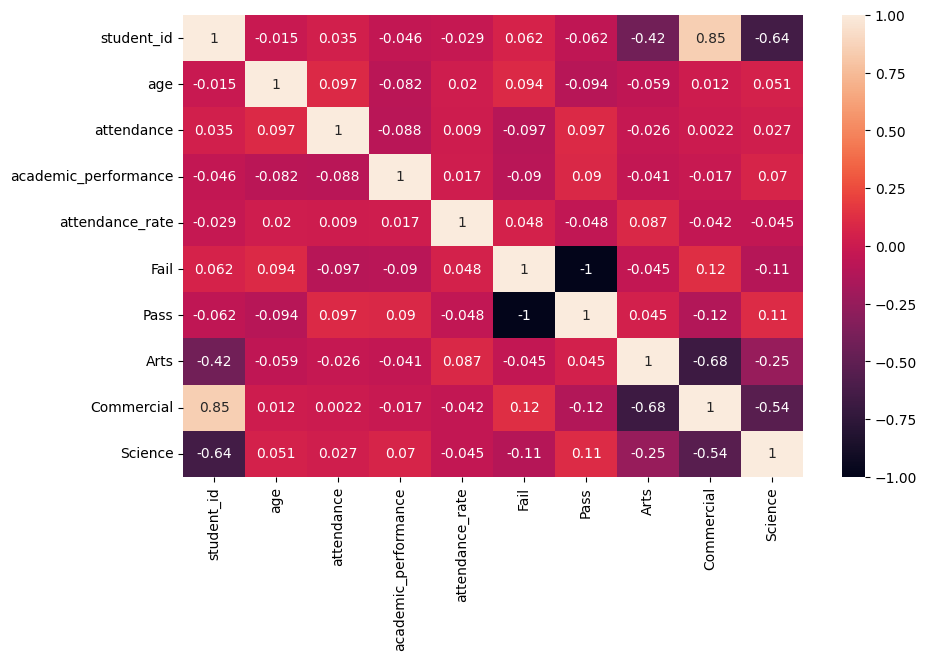

In [89]:
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True)
plt.savefig('heat.png')

Based on the data provided:
- The more commercial students we have, the more failures for the school.
- There is a relationship between the attendance of students and their academic performance.

In [81]:
teach.head()

,teacherid,name,subject_specialization,years_of_experience
0,1,Temitope Odeyemi,Mathematics,8
1,2,Anuoluwapo Chukwu,Mathematics,2
2,3,Omolara Lawal,Mathematics,12
3,4,Modupe Fagbemi,Biology,18
4,5,Musa Olumide,Biology,12


In [88]:
teach.duplicated().sum()

0

In [87]:
teach.name.value_counts

<bound method IndexOpsMixin.value_counts of 0            Temitope Odeyemi
1           Anuoluwapo Chukwu
2               Omolara Lawal
3              Modupe Fagbemi
4                Musa Olumide
               ...           
65            Opeyemi Agboola
66              Tunde Makinde
67            Kehinde Anyanwu
68    Oluwadamilola Okoroafor
69              Uche Suleiman
Name: name, Length: 70, dtype: object>

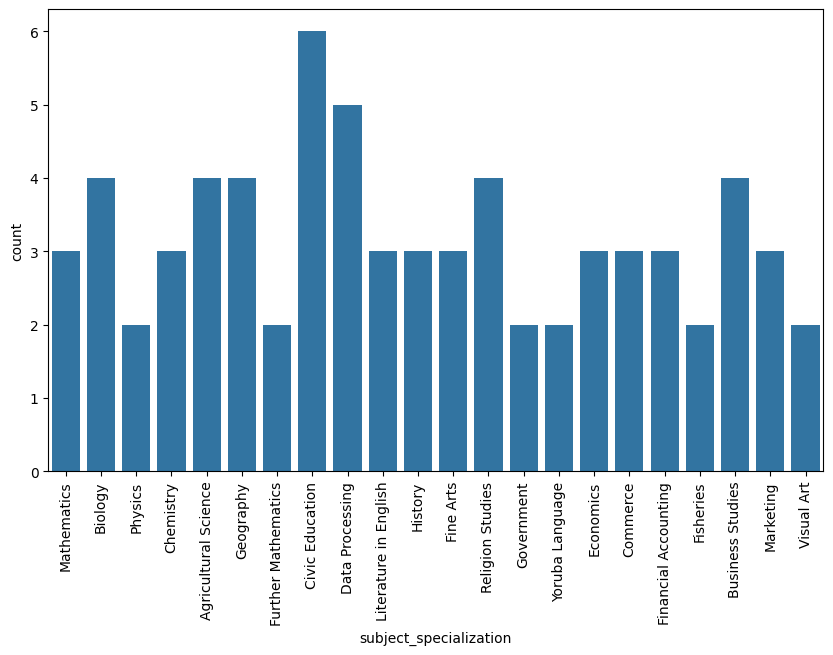

In [86]:
plt.figure(figsize=(10,6))
sns.countplot(data=teach, x='subject_specialization')
plt.xticks(rotation=90)
plt.show()

- There appears to be 3 teachers taking commercial subjects which i fairly good. So the teaching method of the teachers need to be observed because of the failure of students in waec.